## Manhattan Distance

Import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import os

# import tensorflow as tf
# from tensorflow import keras
# from keras.datasets import cifar10

Utility functions for loading CIFAR10 Dataset

In [2]:
# Source: https://github.com/snatch59/load-cifar-10/blob/master/load_cifar_10_alt.py

def load_batch(file_path, label_key='labels'):
    """Load a batch of CIFAR data"""
    with open(file_path, 'rb') as f:
        d = pickle.load(f, encoding='bytes')
        # decode utf8
        d_decoded = {}
        for k, v in d.items():
            d_decoded[k.decode('utf8')] = v
        d = d_decoded
    data = d['data']
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels


def load_data(path):
    """Load CIFAR10 dataset"""
    num_train_samples = 50000

    x_train_local = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train_local = np.empty((num_train_samples,), dtype='uint8')

    for i in range(1, 6):
        batch_file_path = os.path.join(path, 'data_batch_' + str(i))
        (x_train_local[(i - 1) * 10000: i * 10000, :, :, :],
         y_train_local[(i - 1) * 10000: i * 10000]) = load_batch(batch_file_path)
        
    fpath = os.path.join(path, 'test_batch')
    x_test_local, y_test_local = load_batch(fpath)

    y_train_local = np.reshape(y_train_local, (len(y_train_local), 1))
    y_test_local = np.reshape(y_test_local, (len(y_test_local), 1))
    
    x_train_local = x_train_local.transpose(0, 2, 3, 1)
    x_test_local = x_test_local.transpose(0, 2, 3, 1)

    return (x_train_local, y_train_local), (x_test_local, y_test_local)

Load the data and test the shapes

In [3]:
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
path = 'cifar-10-batches-py'
(x_train, y_train), (x_test, y_test) = load_data(path)

print("Train data (x_train): ", x_train.shape)
print("Train labels (y_train): ", y_train.shape)
print("Test data (x_test): ", x_test.shape)
print("Test labels (y_test): ", y_test.shape)

Train data (x_train):  (50000, 32, 32, 3)
Train labels (y_train):  (50000, 1)
Test data (x_test):  (10000, 32, 32, 3)
Test labels (y_test):  (10000, 1)


Plot & test random images with corresponding labels

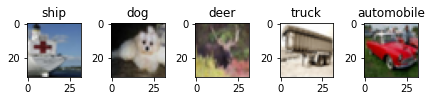

In [4]:
label = ["" for _ in range(10)]
label[0]="airplane"
label[1]="automobile"
label[2]="bird"
label[3]="cat"
label[4]="deer"
label[5]="dog"
label[6]="frog"
label[7]="horse"
label[8]="ship"
label[9]="truck"

# Source: https://stackoverflow.com/a/46616645/4314424
num_plot = 5
figure, axes = plt.subplots(1, num_plot)
for i, ax in enumerate(axes.flat):
    img_id = np.random.randint(0, x_train.shape[0])
    ax.imshow(x_train[img_id])
    ax.set_title(label[y_train[img_id][0]])


figure.tight_layout()
plt.show()
